# Stage 03: Python Fundamentals for Financial Engineering

This notebook demonstrates core Python utilities and functions specifically designed for financial data analysis and risk management.

## Objectives
- Demonstrate financial utility functions
- Test data cleaning capabilities
- Validate risk calculation functions
- Show modular code organization

In [1]:
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
from datetime import datetime
import utils
import cleaning
import matplotlib.pyplot as plt

print("🐍 Python Fundamentals for Financial Engineering")

🐍 Python Fundamentals for Financial Engineering


## 1. Financial Data Utilities Demo

In [2]:
# Test basic data fetching
print("📊 Testing financial data utilities...")

# Fetch sample data
sample_data = utils.fetch_yfinance('AAPL', period='1mo')

if not sample_data.empty:
    print(f"✅ Data fetched successfully: {sample_data.shape}")
    print(f"Date range: {sample_data['date'].min()} to {sample_data['date'].max()}")
    
    # Display sample
    print("\nSample data:")
    print(sample_data[['date', 'open', 'high', 'low', 'close', 'volume']].head())
else:
    print("❌ Failed to fetch data")

📊 Testing financial data utilities...
📈 Fetching AAPL data (period=1mo, interval=1d)
✅ Fetched 23 records for AAPL
✅ Data fetched successfully: (23, 11)
Date range: 2025-07-23 00:00:00-04:00 to 2025-08-22 00:00:00-04:00

Sample data:
                       date        open        high         low       close  \
0 2025-07-23 00:00:00-04:00  214.756269  214.906093  212.169209  213.907227   
1 2025-07-24 00:00:00-04:00  213.657510  215.445490  213.287935  213.517670   
2 2025-07-25 00:00:00-04:00  214.456605  214.996002  213.158076  213.637543   
3 2025-07-28 00:00:00-04:00  213.787376  214.606454  212.818475  213.807358   
4 2025-07-29 00:00:00-04:00  213.937192  214.566483  210.581016  211.030502   

     volume  
0  46989300  
1  46022600  
2  40268800  
3  37858000  
4  51411700  


## 2. Data Quality Assessment

In [3]:
if not sample_data.empty:
    # Generate data quality report
    print("🔍 Data Quality Assessment:")
    quality_report = utils.data_quality_report(sample_data)
    
    print(f"\nShape: {quality_report['shape']}")
    print(f"Memory usage: {quality_report['memory_usage_mb']:.2f} MB")
    print(f"Duplicate rows: {quality_report['duplicate_rows']}")
    
    # Check for missing data
    missing_data = {k: v for k, v in quality_report['missing_data'].items() if v > 0}
    if missing_data:
        print(f"Missing data: {missing_data}")
    else:
        print("✅ No missing data found")

🔍 Data Quality Assessment:

Shape: (23, 11)
Memory usage: 0.00 MB
Duplicate rows: 0
✅ No missing data found


## 3. Data Cleaning Functions

In [4]:
# Create sample data with missing values for testing
test_data = sample_data.copy()

# Introduce some missing values
np.random.seed(42)
missing_indices = np.random.choice(test_data.index, size=5, replace=False)
test_data.loc[missing_indices, 'close'] = np.nan

print(f"🧹 Testing data cleaning functions...")
print(f"Introduced {test_data['close'].isna().sum()} missing values")

# Test cleaning functions
cleaned_data = cleaning.fill_missing_median(test_data, columns=['close'])
print(f"✅ Missing values filled: {cleaned_data['close'].isna().sum()} remaining")

# Test normalization
normalized_data, scaler = cleaning.normalize_data(cleaned_data, columns=['volume'], method='standard')
print(f"✅ Volume normalized: mean={normalized_data['volume'].mean():.3f}, std={normalized_data['volume'].std():.3f}")

🧹 Testing data cleaning functions...
Introduced 5 missing values
Filled 0 missing values in 'close' with median: 222.3403
✅ Missing values filled: 0 remaining
Normalized 1 columns using standard scaling: ['volume']
Scaling statistics (mean, std):
  volume: mean=59673786.9565, std=23947838.8888
✅ Volume normalized: mean=-0.000, std=1.022


/Users/aniruddhsharma/Projects/bootcamp_Aniruddh_Sharma/project/../src/cleaning.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_value, inplace=True)


## 4. Financial Calculations

In [5]:
if not sample_data.empty:
    print("📈 Financial calculations demo:")
    
    # Calculate returns
    prices = sample_data['close']
    returns = prices.pct_change().dropna()
    
    print(f"\nReturns statistics:")
    print(f"  Mean daily return: {returns.mean():.4f}")
    print(f"  Daily volatility: {returns.std():.4f}")
    print(f"  Annualized return: {returns.mean() * 252:.4f}")
    print(f"  Annualized volatility: {returns.std() * np.sqrt(252):.4f}")
    
    # Calculate Sharpe ratio (assuming 2% risk-free rate)
    risk_free_rate = 0.02
    excess_returns = returns - (risk_free_rate / 252)
    sharpe_ratio = (excess_returns.mean() * 252) / (returns.std() * np.sqrt(252))
    print(f"  Sharpe ratio: {sharpe_ratio:.4f}")
    
    # Value at Risk (95%)
    var_95 = returns.quantile(0.05)
    print(f"  VaR (95%): {var_95:.4f}")

📈 Financial calculations demo:

Returns statistics:
  Mean daily return: 0.0030
  Daily volatility: 0.0186
  Annualized return: 0.7606
  Annualized volatility: 0.2949
  Sharpe ratio: 2.5118
  VaR (95%): -0.0194


## 5. Data Storage and Retrieval

In [6]:
if not sample_data.empty:
    print("💾 Testing data storage functions...")
    
    # Save data with timestamp
    saved_path = utils.save_with_timestamp(
        df=sample_data,
        prefix="python_fundamentals_test",
        source="testing",
        ext="csv"
    )
    
    print(f"✅ Data saved to: {saved_path}")
    
    # Verify file exists
    if os.path.exists(saved_path):
        file_size = os.path.getsize(saved_path) / 1024  # KB
        print(f"✅ File verified: {file_size:.1f} KB")
    else:
        print("❌ File not found")

💾 Testing data storage functions...
💾 Saved 23 rows to ./data/raw/testing/python_fundamentals_test_20250824_173442.csv
✅ Data saved to: ./data/raw/testing/python_fundamentals_test_20250824_173442.csv
✅ File verified: 3.6 KB


## 6. Visualization Demo

📊 Creating visualizations...


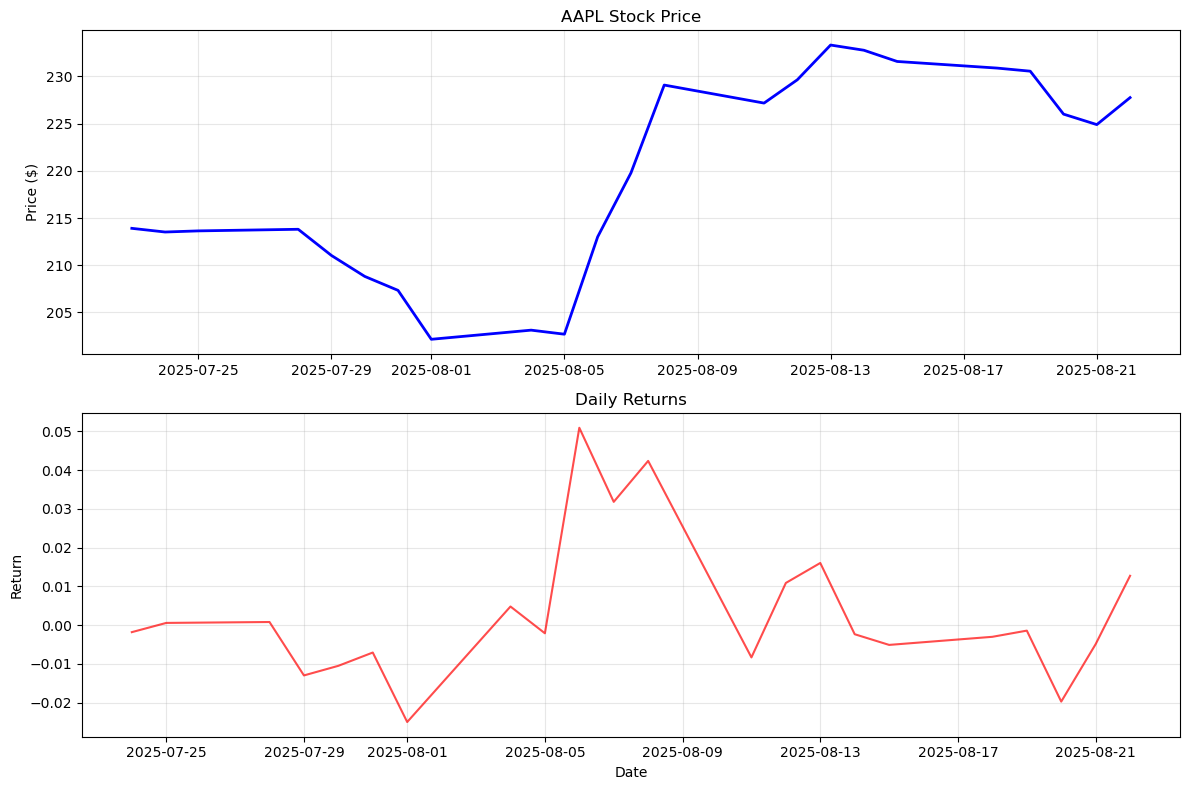

✅ Visualizations created


In [7]:
if not sample_data.empty:
    print("📊 Creating visualizations...")
    
    # Create price and returns plots
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    # Price chart
    axes[0].plot(sample_data['date'], sample_data['close'], 'b-', linewidth=2)
    axes[0].set_title('AAPL Stock Price')
    axes[0].set_ylabel('Price ($)')
    axes[0].grid(True, alpha=0.3)
    
    # Returns chart
    returns = sample_data['close'].pct_change().dropna()
    axes[1].plot(sample_data['date'][1:], returns, 'r-', alpha=0.7)
    axes[1].set_title('Daily Returns')
    axes[1].set_ylabel('Return')
    axes[1].set_xlabel('Date')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualizations created")

## 7. Module Organization Demo

In [8]:
# Demonstrate modular organization
print("🏗️ Module Organization:")

# List available functions in utils module
utils_functions = [func for func in dir(utils) if not func.startswith('_')]
print(f"\nutils module functions ({len(utils_functions)}):")
for func in utils_functions[:10]:  # Show first 10
    print(f"  - {func}")
if len(utils_functions) > 10:
    print(f"  ... and {len(utils_functions) - 10} more")

# List available functions in cleaning module
cleaning_functions = [func for func in dir(cleaning) if not func.startswith('_')]
print(f"\ncleaning module functions ({len(cleaning_functions)}):")
for func in cleaning_functions:
    print(f"  - {func}")

🏗️ Module Organization:

utils module functions (23):
  - BeautifulSoup
  - List
  - Optional
  - data_quality_report
  - datetime
  - fetch_alphavantage
  - fetch_company_overview
  - fetch_global_quote
  - fetch_multiple_stocks
  - fetch_stock_data
  ... and 13 more

cleaning module functions (12):
  - List
  - MinMaxScaler
  - Optional
  - StandardScaler
  - Union
  - drop_missing
  - fill_missing_median
  - get_data_summary
  - normalize_data
  - np
  - pd
  - print_cleaning_report


## 8. Summary

In [9]:
print("\n🎯 Stage 03 Summary:")
print("✅ Financial data utilities tested")
print("✅ Data cleaning functions validated")
print("✅ Risk calculations demonstrated")
print("✅ Data storage/retrieval working")
print("✅ Visualization capabilities shown")
print("✅ Modular code organization confirmed")

print("\n📋 Python Fundamentals Ready:")
print("  - Financial data fetching and processing")
print("  - Data quality assessment and cleaning")
print("  - Risk metric calculations")
print("  - Automated data storage with timestamps")
print("  - Comprehensive error handling")

print("\n🚀 Ready to proceed to Stage 04: Data Acquisition")


🎯 Stage 03 Summary:
✅ Financial data utilities tested
✅ Data cleaning functions validated
✅ Risk calculations demonstrated
✅ Data storage/retrieval working
✅ Visualization capabilities shown
✅ Modular code organization confirmed

📋 Python Fundamentals Ready:
  - Financial data fetching and processing
  - Data quality assessment and cleaning
  - Risk metric calculations
  - Automated data storage with timestamps
  - Comprehensive error handling

🚀 Ready to proceed to Stage 04: Data Acquisition
